In [95]:
#!pip3 install -I -r requirements.txt --quiet
!pip3 install hopsworks
!which python3
# Test hopsworks
try:
   import hopsworks
except ImportError:
   print()
   print("Hopsworks module not found!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/usr/bin/python3


# Load the traning data
Done locally from `./titanic.csv`

In [133]:
import pandas as pd

titanic_df = pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/titanic.csv")



# drop ticket and passenger id columns
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#   titanic_df["Ticket"]
print("\n")
titanic_df.drop(["Ticket","PassengerId"], axis=1, inplace=True)

# convert sex to category
titanic_df["Sex"].astype("category")


0               A/5 21171
1                PC 17599
2        STON/O2. 3101282
3                  113803
4                  373450
5                  330877
6                   17463
7                  349909
8                  347742
9                  237736
10                PP 9549
11                 113783
12              A/5. 2151
13                 347082
14                 350406
15                 248706
16                 382652
17                 244373
18                 345763
19                   2649
20                 239865
21                 248698
22                 330923
23                 113788
24                 349909
25                 347077
26                   2631
27                  19950
28                 330959
29                 349216
30               PC 17601
31               PC 17569
32                 335677
33             C.A. 24579
34               PC 17604
35                 113789
36                   2677
37             A./5. 2152
38          

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: category
Categories (2, object): ['female', 'male']

# Get overview of data

In [19]:
from IPython.core.interactiveshell import InteractiveShell

# Allow multiple outputs
InteractiveShell.ast_node_interactivity = "all"

### Check NaNs

In [20]:
# Describe dataframe
print("describe:\n")
titanic_df.describe()

# Check amount of NaNs
print("\n\nNaNs:\n")
titanic_df.isnull().sum(axis = 0)

# Check NaNs in age
print("\n\nageNaNs:\n")
titanic_df.loc[titanic_df["Age"].isna()]

describe:



,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200




NaNs:



Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64



ageNaNs:



,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,NaN,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,NaN,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,NaN,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...
859,0,3,"Razi, Mr. Raihed",male,NaN,0,0,7.2292,NaN,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.5500,NaN,S
868,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,9.5000,NaN,S
878,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,7.8958,NaN,S


Take aways:

- Cabin has alot of NaNs, might need to drop
- Age has not as many NaNs, can resample them

### Check Name column

In [21]:
titanic_df["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Take aways:

- Every name has a title
- Might be able to use to resample missing ages
- Titles Mr and Mrs represent being husband/wife which is probably quite relevant for survivability

### Check some gut feelings

In [16]:
# titanic_df.loc[(titanic_df["Pclass"] == 3) & (titanic_df["Cabin"] == "G6")]
print("female survived:")
len(titanic_df.loc[(titanic_df["Survived"] == 1) & (titanic_df["Sex"] == "female")])/len(titanic_df.loc[titanic_df["Sex"] == "female"])

print("\n\nchild survived:")
len(titanic_df.loc[(titanic_df["Survived"] == 1) & (titanic_df["Age"] <= 8 )])/len(titanic_df.loc[titanic_df["Age"] <= 8])

print("\n\nmale survived:")
len(titanic_df.loc[(titanic_df["Survived"] == 1) & (titanic_df["Sex"] == "male")])/len(titanic_df.loc[(titanic_df["Sex"] == "male")])


female survived:


0.7420382165605095



child survived:


0.6666666666666666



male survived:


0.18890814558058924

### Correlation Matrix

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


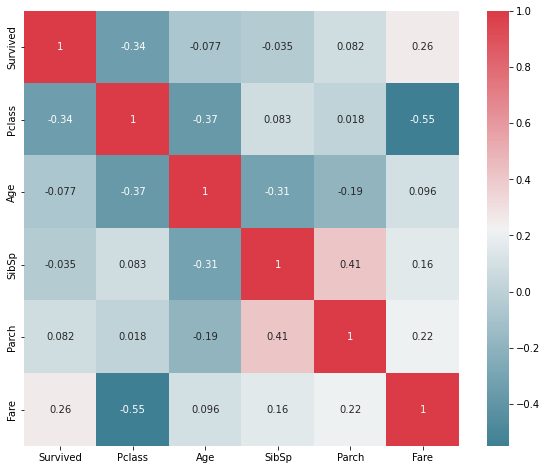

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f, ax = plt.subplots(figsize=(10, 8))
corr = titanic_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

Take aways:

- Might be able to create a better feature for family on board
- Many features are decently correlated with eachother which can be used to fill in missing values

### Plot survival distributions based on features

#### Age

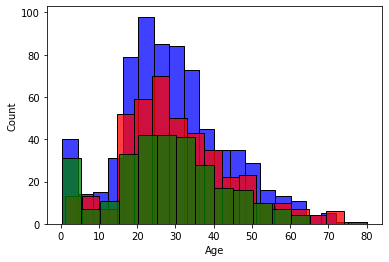

<Figure size 432x288 with 0 Axes>

In [97]:
import seaborn as sns
# distribution of survival based on age
survived = titanic_df["Survived"] == 1

# fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))

# distribution of age
sns.histplot(titanic_df['Age'], label="Age", color="blue",)

sns.histplot(titanic_df[~survived]['Age'], label="Not Survived", color="red")
sns.histplot(titanic_df[survived]['Age'], label="Survived", color="green")

plt.show()
plt.clf()


##### **Takeaways**:
Peak in survivability between 0-5 (significant difference between 0-5 and 5-10 which could be because kids 0-5 can be easily carried while 5-10 can't be carried nor can handle themselves), peak in deathrate between 15-30.


In [48]:
# titanic_df['Age'] = pd.cut(titanic_df['Age'],[0,5,10,15,30,65,150])

#### Fare

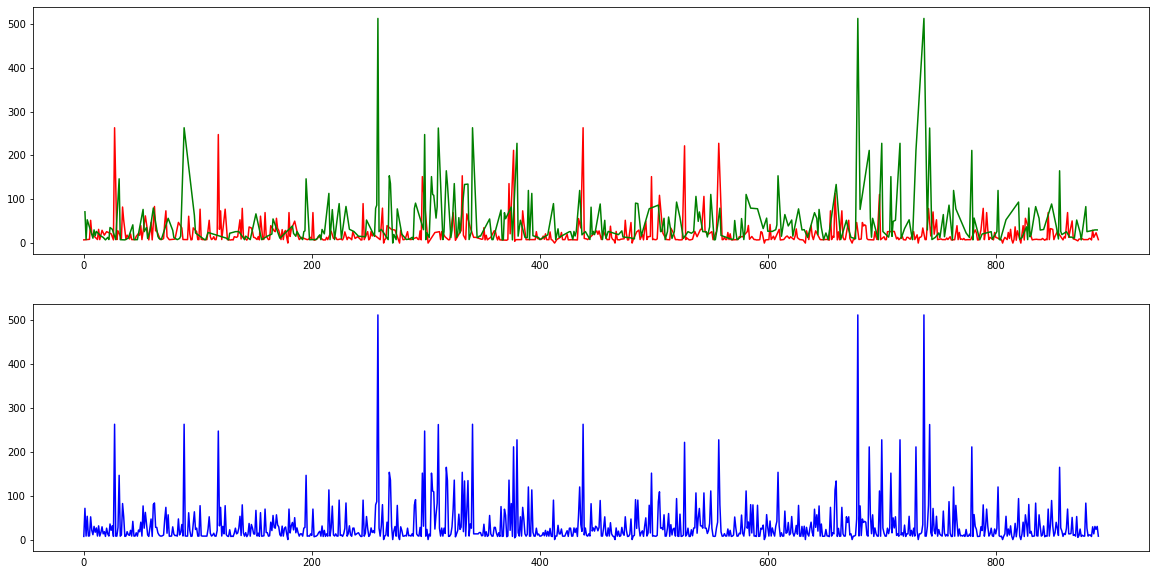

<Figure size 432x288 with 0 Axes>

In [110]:
# distribution of survival based on Fare
survived = titanic_df["Survived"] == 1

#not survived based on Fare
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(20)
axs[0].plot(titanic_df[~survived]['Fare'], color="red")
axs[0].plot(titanic_df[survived]['Fare'], color="green")

axs[1].plot(titanic_df['Fare'], color="blue",)
plt.show()
plt.clf()


**Takeaways:**
Over 600 seems to be highly correlated with survivability while 0-200 seems to be very correlated with deathrate. This makes sense since cheaper tickets might be on a deck further away from lifeboats or further down in the boat. There are however a spike in survivability in the 200-400 range which might have something to do with the position of the cabins at that price range, binning in categories of 200 seems reasonable.

In [47]:
# titanic_df['Fare'] = pd.cut(titanic_df['Fare'],[0,200,400,600,1000])

#### Categoricals: plotting code stolen from Gunes Evitan

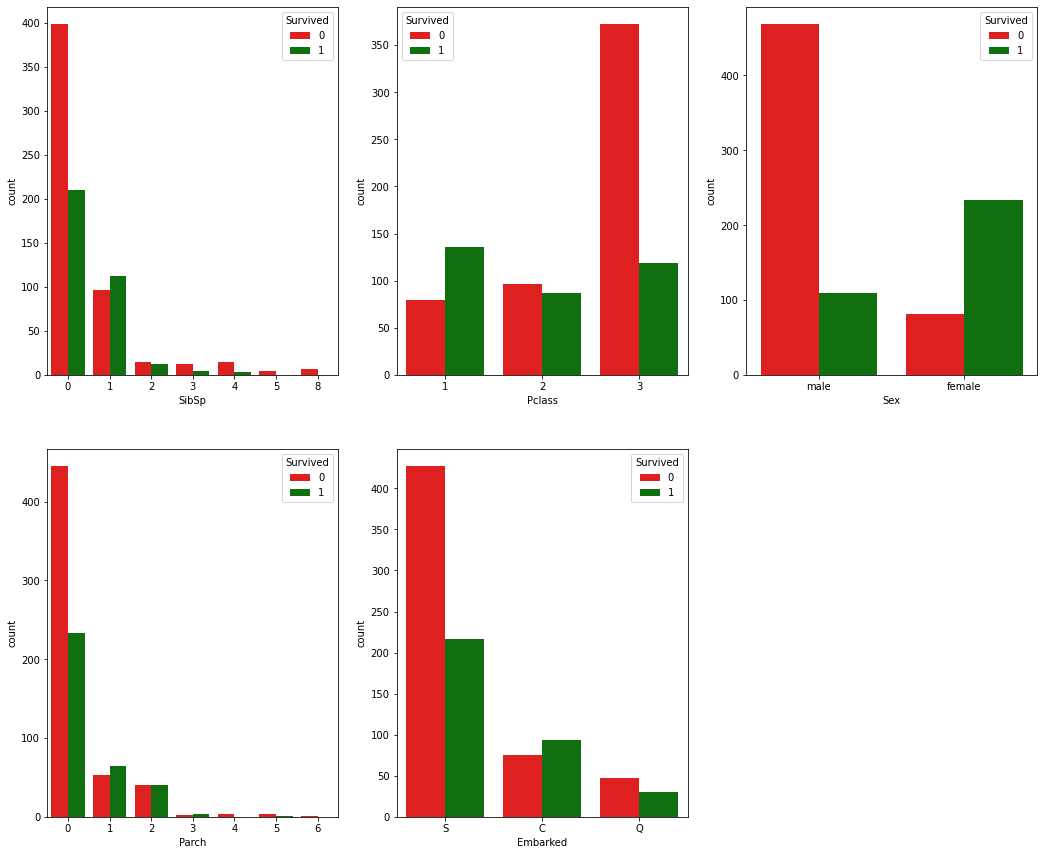

<Figure size 432x288 with 0 Axes>

In [115]:

cats = ['SibSp', 'Pclass', 'Sex', 'Parch', 'Embarked']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))
plt.subplots_adjust(right=1.5, top=1.25)

for i, cat in enumerate(cats, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=cat, hue='Survived', data=titanic_df, palette=['red','green'])
    
   

plt.show()
plt.clf()

**Takeaways:**

The categorical features all seem to have predictive value. One thing to note with the SibSp feature is that for SibSp > 1 we now that the amount of siblings is >= 1 because you can only have one spouse, this might explain why survivability drops at SibSp > 1 compared to SibSp = 1. If your parents have other kids to save you are less likely to get saved yourself. The data points for SibSp > 1 are also a lot fewer so it could make sense to bin these together to avoid overfitting such that all SibSp>1 are in 1 category that corresponds to having siblings

In [116]:
# titanic_df['SibSp'] = pd.cut(titanic_df['SibSp'], [0,1,2,7], right=False)

0      [1, 2)
1      [1, 2)
2      [0, 1)
3      [1, 2)
4      [0, 1)
        ...  
886    [0, 1)
887    [0, 1)
888    [1, 2)
889    [0, 1)
890    [0, 1)
Name: SibSp, Length: 891, dtype: category
Categories (3, interval[int64, left]): [[0, 1) < [1, 2) < [2, 7)]

#### Cabin


After doing some research we noticed that the letter in the cabin number corresponds to a deck of the boat, having deck as a categorical feature should have predictive value since you need to get to the top deck in order to board the lifeboats.


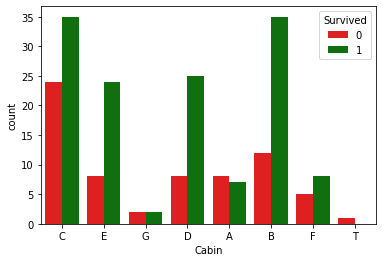

<Figure size 432x288 with 0 Axes>

In [137]:
titanic_df["Cabin"] = titanic_df["Cabin"].str.slice(0,1)
sns.countplot(x="Cabin", hue='Survived', data=titanic_df, palette=['red','green'])

plt.show()
plt.clf()


KeyError: ignored

# Feature engineering

### Replace Name with corresponding title

In [ ]:
if "Name" in titanic_df.columns:
    titanic_df["Title"] = titanic_df.Name.str.extract("([A-Za-z]+)\\.")
    titanic_df.drop("Name", axis=1, inplace=True)
titanic_df["Title"].unique()
titanic_df.head()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
1,1,1,female,38.0,1,0,71.2833,C85,C,Mrs
2,1,3,female,26.0,0,0,7.9250,NaN,S,Miss
3,1,1,female,35.0,1,0,53.1000,C123,S,Mrs
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr


## Resample missing ages from titles and ages

### Replace missing Mrs (men over 18)

In [ ]:
# titanic_df.loc[(titanic_df["Title"] == "Mr") & titanic_df["Age"].isna()]
men_over_18_df = titanic_df.loc[(titanic_df["Title"] == "Mr") & titanic_df["Age"].notna() & (titanic_df["Age"] >= 18)]
men_over_18_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,NaN,S,Mr
4,0,3,male,35.0,0,0,8.0500,NaN,S,Mr
6,0,1,male,54.0,0,0,51.8625,E46,S,Mr
12,0,3,male,20.0,0,0,8.0500,NaN,S,Mr
13,0,3,male,39.0,1,5,31.2750,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...
881,0,3,male,33.0,0,0,7.8958,NaN,S,Mr
883,0,2,male,28.0,0,0,10.5000,NaN,S,Mr
884,0,3,male,25.0,0,0,7.0500,NaN,S,Mr
889,1,1,male,26.0,0,0,30.0000,C148,C,Mr


In [ ]:
import os
    
LOCAL=True

if LOCAL == False:
   stub = modal.Stub()
   image = modal.Image.debian_slim().pip_install(["hopsworks","joblib","seaborn","sklearn","dataframe-image"]) 

   @stub.function(image=image, schedule=modal.Period(days=1), secret=modal.Secret.from_name("jim-hopsworks-ai"))
   def f():
       g()

def g():
    import hopsworks
    import pandas as pd
    
    project = hopsworks.login()
    fs = project.get_feature_store()
    # iris_df = pd.read_csv("https://repo.hops.works/master/hopsworks-tutorials/data/iris.csv")
    titanic_df = pd.read_csv("./titanic.csv")
    titanic_fg = fs.get_or_create_feature_group(
        name="iris_modal",
        version=1,
        primary_key=["sepal_length","sepal_width","petal_length","petal_width"], 
        description="Iris flower dataset")
    titanic_fg.insert(titanic_df, write_options={"wait_for_job" : False})

if __name__ == "__main__":
    if LOCAL == True :
        g()
    else:
        with stub.run():
            f()
